In [15]:
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
df = pd.read_csv('sampleData', delimiter='\t', header=None)
print(df.shape)
print(df.columns)

(1615789, 90)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89],
           dtype='int64')


### Missing values [-1] and zero columns

In [17]:
missing_col_ids = []
zero_col_ids = []
for col_id in range(df.shape[1]):
    missing_percentage = df[df[col_id] == -1].shape[0] / float(df.shape[0])
    zero_percentage = df[df[col_id] == 0].shape[0] / float(df.shape[0])
    if missing_percentage == 1:
        missing_col_ids.append(col_id)
    if zero_percentage == 1:
        zero_col_ids.append(col_id)
print(missing_col_ids)
print(zero_col_ids)

[55, 56, 74]
[1, 6, 8, 14, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 50, 52, 57, 60, 66, 68, 69, 70, 71, 72, 73]


### Distributions of zeros

<Container object of 90 artists>

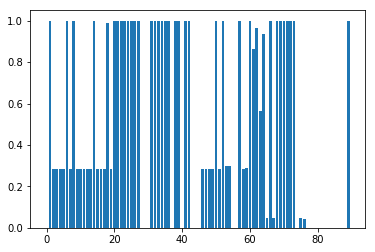

In [4]:
col_id_percentage = {}
for col_id in range(df.shape[1]):
    percentage = df[df[col_id] == 0].shape[0] / float(df.shape[0])
    col_id_percentage[col_id] = percentage
plt.bar(col_id_percentage.keys(), col_id_percentage.values())

## It indicates that there are many columns with all zeros(0) and all missing values(-1). Lets discard them

In [18]:
new_cols = list(set(df.columns) - set(zero_col_ids) - set(missing_col_ids))
df_new = df[new_cols]
print('Number of columns in the new dataframe: %s' % df_new.shape[1])

Number of columns in the new dataframe: 54


<Container object of 54 artists>

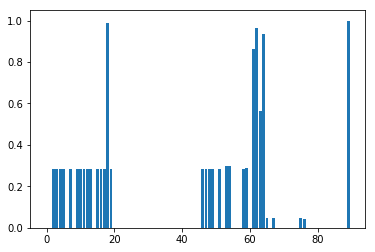

In [9]:
col_id_percentage = {}
for col_id in df_new.columns:
    percentage = df_new[df_new[col_id] == 0].shape[0] / float(df_new.shape[0])
    col_id_percentage[col_id] = percentage
plt.bar(col_id_percentage.keys(), col_id_percentage.values())

In [10]:
col_id_percentage

{0: 1.2377853791553228e-06,
 2: 0.2824725258062779,
 3: 0.2824725258062779,
 4: 0.2824725258062779,
 5: 0.2824725258062779,
 7: 0.2824725258062779,
 9: 0.2824725258062779,
 10: 0.2824725258062779,
 11: 0.2824725258062779,
 12: 0.2824725258062779,
 13: 0.2824725258062779,
 15: 0.2824725258062779,
 16: 0.2824725258062779,
 17: 0.2824725258062779,
 18: 0.9879761528268852,
 19: 0.2824725258062779,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 37: 0.0007296744810120628,
 40: 0.0007296744810120628,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.2824725258062779,
 47: 0.2824725258062779,
 48: 0.2824725258062779,
 49: 0.2824725258062779,
 51: 0.2824725258062779,
 53: 0.29836135782580525,
 54: 0.29836135782580525,
 58: 0.2824725258062779,
 59: 0.28719529592044507,
 61: 0.8616465392449137,
 62: 0.9649162112132216,
 63: 0.563184920803397,
 64: 0.9345991339215702,
 65: 0.0463674403031584,
 67: 0.0463674403031584,
 75: 0.04611616987118986,
 76: 0.04221590814147144,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0

### Distribution of nulls : no null values

In [5]:
df.isnull().sum().sum()

0

### User Id observation : it is not a primary key, we cannot discard it

In [13]:
print('Total number of records: %s' %df_new.shape[0])
print('Total number of unique user ids %s' %len(df_new[0].unique()))

Total number of records: 1615789
Total number of unique user ids 120034


## Uuhhhhh! this is totally imbalanced dataset

In [14]:
df_new[89].value_counts()

0    1614664
1       1125
Name: 89, dtype: int64

In [15]:
print('Percentage of class A(ones) ' + str(df_new[df_new[89] == 0].shape[0]/float(df_new.shape[0]) * 100))
print('Percentage of class B(zeros) ' + str(df_new[df_new[89] == 1].shape[0]/float(df_new.shape[0]) * 100))

Percentage of class A(ones) 99.93037457242251
Percentage of class B(zeros) 0.06962542757748691


## Percentage of missing values 

In [33]:
for col in df_new.columns:
    if df_new[df_new[col] == -1].shape[0] != 0:
        print(col, end='\t')
        print(df_new[df_new[col] == -1].shape[0], end = '\t')
        print(df_new[df_new[col] == -1].shape[0]/float(df_new.shape[0]))

53	456416	0.2824725258062779
54	456416	0.2824725258062779
59	1179	0.0007296744810120628


## Dummy Classifier

In [275]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier()
model.fit(train_data.data, train_data.label)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [278]:
y_true = test_data.label
y_pred = model.predict_proba(test_data.data)

fpr, tpr, thresholds = roc_curve(test_data.label, y_pred[:, 1])
auc(fpr, tpr)

0.4996480174401681

## Logistic Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [22]:
new_cols = list(set(df.columns) - set(zero_col_ids) - set(missing_col_ids))
df_new = df[new_cols]
for index in range(77, 88, 1):
    df_new.loc[:, index] = df_new[index].astype('category')
one_hot_encoder = OneHotEncoder(sparse=False)
cat_df = pd.DataFrame(one_hot_encoder.fit_transform(df_new.loc[:,77: 88]))

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
log_df = pd.concat([df_new.loc[:,0:76], cat_df], axis=1)

In [8]:
log_df

1


In [10]:
print(df_new.loc[:,0:76].shape)
print(cat_df.shape)
# print(log_df.shape)

(1615789, 41)
(1615789, 31455)


In [ ]:
lg_model = LogisticRegression()
lg_model.fit(train_data.data, train_data.label)

In [30]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, f1_score, roc_curve, auc

In [21]:
for index in range(77, 88, 1):
    df_new.loc[:, index] = df_new[index].astype('category')

x = df_new.loc[:, 0:88]
y = df_new.loc[:, 89]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=44, stratify=y)
x_test, x_cv, y_test, y_cv = train_test_split(x_test, y_test, test_size=0.5, random_state=44, stratify=y_test)

categorical_features = list(df_new.loc[:, 77:88].columns)
train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_features, free_raw_data=False)
test_data = lgb.Dataset(x_test, label=y_test, categorical_feature=categorical_features, free_raw_data=False)
cv_data = lgb.Dataset(x_cv, label=y_cv, categorical_feature=categorical_features, free_raw_data=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Model initialization

In [24]:
parameters = {
#     'scale_pos_weight': 1000,
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.0009,
    'verbose': 100,
    'n_estimators': 150
}

# model = lightgbm.train(parameters,
#                        train_data,
#                        valid_sets=cv_data,
#                        num_boost_round=30,
#                        early_stopping_rounds=5)
model = lgb.LGBMClassifier(**parameters)
model.fit(train_data.data, train_data.label, eval_set=[(cv_data.data, cv_data.label)], early_stopping_rounds=10, eval_metric='auc')

##binary_logloss TODO

[1]	valid_0's auc: 0.694316
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.721428
[3]	valid_0's auc: 0.731921
[4]	valid_0's auc: 0.737216
[5]	valid_0's auc: 0.73041
[6]	valid_0's auc: 0.737255
[7]	valid_0's auc: 0.736703
[8]	valid_0's auc: 0.738633
[9]	valid_0's auc: 0.739066
[10]	valid_0's auc: 0.740478
[11]	valid_0's auc: 0.741173
[12]	valid_0's auc: 0.740193
[13]	valid_0's auc: 0.739514
[14]	valid_0's auc: 0.739484
[15]	valid_0's auc: 0.740557
[16]	valid_0's auc: 0.74132
[17]	valid_0's auc: 0.741693
[18]	valid_0's auc: 0.742497
[19]	valid_0's auc: 0.742227
[20]	valid_0's auc: 0.742907
[21]	valid_0's auc: 0.742442
[22]	valid_0's auc: 0.742659
[23]	valid_0's auc: 0.742874
[24]	valid_0's auc: 0.742004
[25]	valid_0's auc: 0.742051
[26]	valid_0's auc: 0.742196
[27]	valid_0's auc: 0.742229
[28]	valid_0's auc: 0.742875
[29]	valid_0's auc: 0.743301
[30]	valid_0's auc: 0.743626
[31]	valid_0's auc: 0.743907
[32]	valid_0's auc: 0.744254
[33]	valid_0's auc: 0

LGBMClassifier(application='binary', bagging_fraction=0.5, bagging_freq=20,
        boosting='gbdt', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, feature_fraction=0.5, is_unbalance='true',
        learning_rate=0.0009, max_depth=-1, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
        verbose=100)

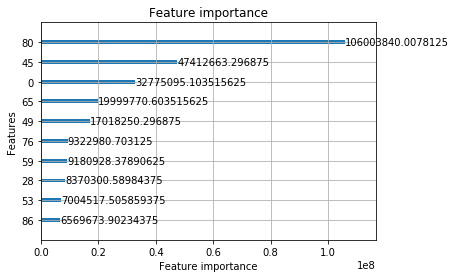

In [25]:
lgb.plot_importance(model, importance_type='gain', max_num_features=10)

In [26]:
y_pred = model.predict_proba(test_data.data)
print(y_pred)

[[0.99277967 0.00722033]
 [0.98955884 0.01044116]
 [0.99801823 0.00198177]
 ...
 [0.9740046  0.0259954 ]
 [0.99159542 0.00840458]
 [0.99579699 0.00420301]]


In [27]:
fpr, tpr, thresholds = roc_curve(test_data.label, y_pred[:, 1])#pos_label=1

In [28]:
thresholds

array([1.05836090e+00, 5.83609008e-02, 4.79457941e-02, ...,
       8.13792331e-04, 8.06794515e-04, 7.78991225e-04])

In [31]:
auc(fpr, tpr)

0.7370271026291314

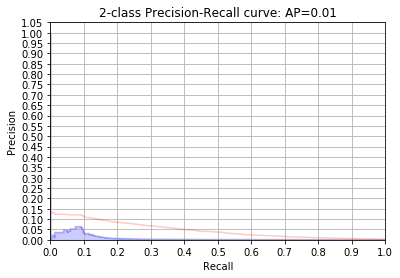

In [251]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from matplotlib.ticker import MultipleLocator
precision, recall, thresholds = precision_recall_curve(test_data.label, y_pred[:, 1])
average_precision = average_precision_score(test_data.label, y_pred[:, 1])

fig, ax = plt.subplots()
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.step(recall[:-1], thresholds, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.grid()


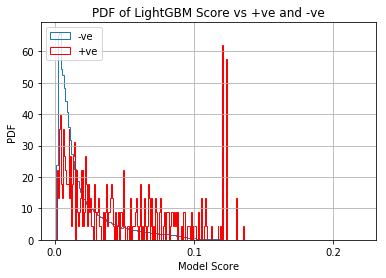

In [256]:
# Density plots
fig, ax = plt.subplots()
n_bins = 200

test_data.label, y_pred[:, 1]

y_test_proba = y_pred[:, 1]

n, bins, patches = ax.hist(y_test_proba[(test_data.label==0)], n_bins, normed=1, histtype='step', cumulative=False, label='-ve')
ax.hist(y_test_proba[(test_data.label==1)], n_bins, normed=1, histtype='step', cumulative=False, label='+ve', color='r')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('PDF of LightGBM Score vs +ve and -ve')
ax.set_xlabel('Model Score')
ax.set_ylabel('PDF')
#plt.savefig(fname)
plt.show()

In [263]:
len(y_test_proba[(test_data.label==1)])

# 1125 * 0.2

338

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.25, 0.2, 0.15, 0.1, 0.05],
    'feature_fraction': [0.55],
    'min_data_in_leaf': [5000], 
    'max_depth': [18],
    'num_leaves': [60],
    'n_estimators': [20],
    'scale_pos_weight': [3, 4, 5 ]
}

estimator = lgb.LGBMClassifier(num_leaves=31)

model = GridSearchCV(estimator, param_grid)


In [280]:
model.fit(train_data.data, train_data.label, eval_set=[(cv_data.data, cv_data.label)], early_stopping_rounds=10, eval_metric='auc')

[1]	valid_0's auc: 0.704754
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.706951
[3]	valid_0's auc: 0.716254
[4]	valid_0's auc: 0.718071
[5]	valid_0's auc: 0.72181
[6]	valid_0's auc: 0.725715
[7]	valid_0's auc: 0.721986
[8]	valid_0's auc: 0.719359
[9]	valid_0's auc: 0.718629
[10]	valid_0's auc: 0.726064
[11]	valid_0's auc: 0.723774
[12]	valid_0's auc: 0.725169
[13]	valid_0's auc: 0.722693
[14]	valid_0's auc: 0.722255
[15]	valid_0's auc: 0.724692
[16]	valid_0's auc: 0.726244
[17]	valid_0's auc: 0.727192
[18]	valid_0's auc: 0.728291
[19]	valid_0's auc: 0.727904
[20]	valid_0's auc: 0.729023
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.729023


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.716983
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.669726
[3]	valid_0's auc: 0.668098
[4]	valid_0's auc: 0.659299
[5]	valid_0's auc: 0.652822
[6]	valid_0's auc: 0.669381
[7]	valid_0's auc: 0.675783
[8]	valid_0's auc: 0.682576
[9]	valid_0's auc: 0.713351
[10]	valid_0's auc: 0.717144
[11]	valid_0's auc: 0.718059
[12]	valid_0's auc: 0.720936
[13]	valid_0's auc: 0.718553
[14]	valid_0's auc: 0.71365
[15]	valid_0's auc: 0.714115
[16]	valid_0's auc: 0.713677
[17]	valid_0's auc: 0.716046
[18]	valid_0's auc: 0.720141
[19]	valid_0's auc: 0.720966
[20]	valid_0's auc: 0.725087
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.725087


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681963
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.663275
[3]	valid_0's auc: 0.674038
[4]	valid_0's auc: 0.665433
[5]	valid_0's auc: 0.658173
[6]	valid_0's auc: 0.67056
[7]	valid_0's auc: 0.678045
[8]	valid_0's auc: 0.674993
[9]	valid_0's auc: 0.685214
[10]	valid_0's auc: 0.685111
[11]	valid_0's auc: 0.686631
[12]	valid_0's auc: 0.690674
[13]	valid_0's auc: 0.691989
[14]	valid_0's auc: 0.694252
[15]	valid_0's auc: 0.694854
[16]	valid_0's auc: 0.695555
[17]	valid_0's auc: 0.69811
[18]	valid_0's auc: 0.696032
[19]	valid_0's auc: 0.697534
[20]	valid_0's auc: 0.698433
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.698433


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703133
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.694826
[3]	valid_0's auc: 0.690027
[4]	valid_0's auc: 0.692347
[5]	valid_0's auc: 0.698145
[6]	valid_0's auc: 0.706655
[7]	valid_0's auc: 0.705364
[8]	valid_0's auc: 0.703225
[9]	valid_0's auc: 0.700944
[10]	valid_0's auc: 0.70702
[11]	valid_0's auc: 0.703189
[12]	valid_0's auc: 0.707084
[13]	valid_0's auc: 0.705537
[14]	valid_0's auc: 0.70497
[15]	valid_0's auc: 0.709281
[16]	valid_0's auc: 0.709579
[17]	valid_0's auc: 0.709078
[18]	valid_0's auc: 0.709496
[19]	valid_0's auc: 0.708757
[20]	valid_0's auc: 0.709567
Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.709579


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.697354
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.633439
[3]	valid_0's auc: 0.62389
[4]	valid_0's auc: 0.62532
[5]	valid_0's auc: 0.623535
[6]	valid_0's auc: 0.640108
[7]	valid_0's auc: 0.644736
[8]	valid_0's auc: 0.663495
[9]	valid_0's auc: 0.718183
[10]	valid_0's auc: 0.619679
[11]	valid_0's auc: 0.568502
[12]	valid_0's auc: 0.555015
[13]	valid_0's auc: 0.526308
[14]	valid_0's auc: 0.509105
[15]	valid_0's auc: 0.507938
[16]	valid_0's auc: 0.50377
[17]	valid_0's auc: 0.5014
[18]	valid_0's auc: 0.499446
[19]	valid_0's auc: 0.498039
Early stopping, best iteration is:
[9]	valid_0's auc: 0.718183


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.70208
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.679057
[3]	valid_0's auc: 0.676655
[4]	valid_0's auc: 0.669423
[5]	valid_0's auc: 0.662705
[6]	valid_0's auc: 0.667223
[7]	valid_0's auc: 0.671343
[8]	valid_0's auc: 0.667025
[9]	valid_0's auc: 0.675249
[10]	valid_0's auc: 0.66973
[11]	valid_0's auc: 0.675042
Early stopping, best iteration is:
[1]	valid_0's auc: 0.70208


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703133
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.691398
[3]	valid_0's auc: 0.69957
[4]	valid_0's auc: 0.700025
[5]	valid_0's auc: 0.708699
[6]	valid_0's auc: 0.710068
[7]	valid_0's auc: 0.704958
[8]	valid_0's auc: 0.704302
[9]	valid_0's auc: 0.705729
[10]	valid_0's auc: 0.709235
[11]	valid_0's auc: 0.711639
[12]	valid_0's auc: 0.710628
[13]	valid_0's auc: 0.713921
[14]	valid_0's auc: 0.714831
[15]	valid_0's auc: 0.717209
[16]	valid_0's auc: 0.719707
[17]	valid_0's auc: 0.719415
[18]	valid_0's auc: 0.719336
[19]	valid_0's auc: 0.719235
[20]	valid_0's auc: 0.720356
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.720356


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.698298
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.679103
[3]	valid_0's auc: 0.649372
[4]	valid_0's auc: 0.638963
[5]	valid_0's auc: 0.628135
[6]	valid_0's auc: 0.628998
[7]	valid_0's auc: 0.630983
[8]	valid_0's auc: 0.639099
[9]	valid_0's auc: 0.689661
[10]	valid_0's auc: 0.683977
[11]	valid_0's auc: 0.678725
Early stopping, best iteration is:
[1]	valid_0's auc: 0.698298


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.706623
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.673554
[3]	valid_0's auc: 0.675291
[4]	valid_0's auc: 0.672191
[5]	valid_0's auc: 0.664815
[6]	valid_0's auc: 0.663037
[7]	valid_0's auc: 0.665338
[8]	valid_0's auc: 0.66397
[9]	valid_0's auc: 0.675393
[10]	valid_0's auc: 0.669285
[11]	valid_0's auc: 0.669012
Early stopping, best iteration is:
[1]	valid_0's auc: 0.706623


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703479
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.70912
[3]	valid_0's auc: 0.707569
[4]	valid_0's auc: 0.711103
[5]	valid_0's auc: 0.718071
[6]	valid_0's auc: 0.72076
[7]	valid_0's auc: 0.717255
[8]	valid_0's auc: 0.714786
[9]	valid_0's auc: 0.715619
[10]	valid_0's auc: 0.714024
[11]	valid_0's auc: 0.71286
[12]	valid_0's auc: 0.71561
[13]	valid_0's auc: 0.716852
[14]	valid_0's auc: 0.716534
[15]	valid_0's auc: 0.720371
[16]	valid_0's auc: 0.722028
[17]	valid_0's auc: 0.724487
[18]	valid_0's auc: 0.72648
[19]	valid_0's auc: 0.726712
[20]	valid_0's auc: 0.729332
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.729332


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.716983
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.703448
[3]	valid_0's auc: 0.711497
[4]	valid_0's auc: 0.706826
[5]	valid_0's auc: 0.705438
[6]	valid_0's auc: 0.712358
[7]	valid_0's auc: 0.714615
[8]	valid_0's auc: 0.732196
[9]	valid_0's auc: 0.744371
[10]	valid_0's auc: 0.748095
[11]	valid_0's auc: 0.747877
[12]	valid_0's auc: 0.747952
[13]	valid_0's auc: 0.743372
[14]	valid_0's auc: 0.740706
[15]	valid_0's auc: 0.738853
[16]	valid_0's auc: 0.739134
[17]	valid_0's auc: 0.743202
[18]	valid_0's auc: 0.744318
[19]	valid_0's auc: 0.747102
[20]	valid_0's auc: 0.747673
Early stopping, best iteration is:
[10]	valid_0's auc: 0.748095


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681963
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.687181
[3]	valid_0's auc: 0.699061
[4]	valid_0's auc: 0.698066
[5]	valid_0's auc: 0.693612
[6]	valid_0's auc: 0.699729
[7]	valid_0's auc: 0.700893
[8]	valid_0's auc: 0.696263
[9]	valid_0's auc: 0.701207
[10]	valid_0's auc: 0.701729
[11]	valid_0's auc: 0.701797
[12]	valid_0's auc: 0.706725
[13]	valid_0's auc: 0.706871
[14]	valid_0's auc: 0.708474
[15]	valid_0's auc: 0.707152
[16]	valid_0's auc: 0.708139
[17]	valid_0's auc: 0.70911
[18]	valid_0's auc: 0.706275
[19]	valid_0's auc: 0.706932
[20]	valid_0's auc: 0.704291
Did not meet early stopping. Best iteration is:
[17]	valid_0's auc: 0.70911


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699414
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.710838
[3]	valid_0's auc: 0.711573
[4]	valid_0's auc: 0.717444
[5]	valid_0's auc: 0.719326
[6]	valid_0's auc: 0.722801
[7]	valid_0's auc: 0.717806
[8]	valid_0's auc: 0.712031
[9]	valid_0's auc: 0.710531
[10]	valid_0's auc: 0.717243
[11]	valid_0's auc: 0.71298
[12]	valid_0's auc: 0.718742
[13]	valid_0's auc: 0.718614
[14]	valid_0's auc: 0.719085
[15]	valid_0's auc: 0.722775
[16]	valid_0's auc: 0.721724
Early stopping, best iteration is:
[6]	valid_0's auc: 0.722801


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.697354
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.648091
[3]	valid_0's auc: 0.66326
[4]	valid_0's auc: 0.656399
[5]	valid_0's auc: 0.651263
[6]	valid_0's auc: 0.665509
[7]	valid_0's auc: 0.669221
[8]	valid_0's auc: 0.684165
[9]	valid_0's auc: 0.708514
[10]	valid_0's auc: 0.713612
[11]	valid_0's auc: 0.710739
[12]	valid_0's auc: 0.710511
[13]	valid_0's auc: 0.709145
[14]	valid_0's auc: 0.708381
[15]	valid_0's auc: 0.708667
[16]	valid_0's auc: 0.709011
[17]	valid_0's auc: 0.711408
[18]	valid_0's auc: 0.71598
[19]	valid_0's auc: 0.716635
[20]	valid_0's auc: 0.717252
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.717252


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.702063
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.685007
[3]	valid_0's auc: 0.68821
[4]	valid_0's auc: 0.677534
[5]	valid_0's auc: 0.677502
[6]	valid_0's auc: 0.681708
[7]	valid_0's auc: 0.687356
[8]	valid_0's auc: 0.682226
[9]	valid_0's auc: 0.687498
[10]	valid_0's auc: 0.683523
[11]	valid_0's auc: 0.68517
Early stopping, best iteration is:
[1]	valid_0's auc: 0.702063


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699414
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.69512
[3]	valid_0's auc: 0.691186
[4]	valid_0's auc: 0.693175
[5]	valid_0's auc: 0.696093
[6]	valid_0's auc: 0.702746
[7]	valid_0's auc: 0.697827
[8]	valid_0's auc: 0.693773
[9]	valid_0's auc: 0.693858
[10]	valid_0's auc: 0.700086
[11]	valid_0's auc: 0.699705
[12]	valid_0's auc: 0.701623
[13]	valid_0's auc: 0.702831
[14]	valid_0's auc: 0.700429
[15]	valid_0's auc: 0.70177
[16]	valid_0's auc: 0.702703
[17]	valid_0's auc: 0.706057
[18]	valid_0's auc: 0.706168
[19]	valid_0's auc: 0.705934
[20]	valid_0's auc: 0.705361
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.706168


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.698298
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.663386
[3]	valid_0's auc: 0.662336
[4]	valid_0's auc: 0.652911
[5]	valid_0's auc: 0.64914
[6]	valid_0's auc: 0.657434
[7]	valid_0's auc: 0.660698
[8]	valid_0's auc: 0.674779
[9]	valid_0's auc: 0.715751
[10]	valid_0's auc: 0.694866
[11]	valid_0's auc: 0.691202
[12]	valid_0's auc: 0.708007
[13]	valid_0's auc: 0.702398
[14]	valid_0's auc: 0.695022
[15]	valid_0's auc: 0.693318
[16]	valid_0's auc: 0.692632
[17]	valid_0's auc: 0.69192
[18]	valid_0's auc: 0.690434
[19]	valid_0's auc: 0.693657
Early stopping, best iteration is:
[9]	valid_0's auc: 0.715751


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.706623
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.692451
[3]	valid_0's auc: 0.697092
[4]	valid_0's auc: 0.690659
[5]	valid_0's auc: 0.690625
[6]	valid_0's auc: 0.691787
[7]	valid_0's auc: 0.693043
[8]	valid_0's auc: 0.689546
[9]	valid_0's auc: 0.699781
[10]	valid_0's auc: 0.693877
[11]	valid_0's auc: 0.690708
Early stopping, best iteration is:
[1]	valid_0's auc: 0.706623


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703438
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.716567
[3]	valid_0's auc: 0.716214
[4]	valid_0's auc: 0.714258
[5]	valid_0's auc: 0.716444
[6]	valid_0's auc: 0.721906
[7]	valid_0's auc: 0.72546
[8]	valid_0's auc: 0.723932
[9]	valid_0's auc: 0.724302
[10]	valid_0's auc: 0.728827
[11]	valid_0's auc: 0.725557
[12]	valid_0's auc: 0.728132
[13]	valid_0's auc: 0.7292
[14]	valid_0's auc: 0.730235
[15]	valid_0's auc: 0.733165
[16]	valid_0's auc: 0.733943
[17]	valid_0's auc: 0.736133
[18]	valid_0's auc: 0.736467
[19]	valid_0's auc: 0.735874
[20]	valid_0's auc: 0.735585
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.736467


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.716983
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.719687
[3]	valid_0's auc: 0.723385
[4]	valid_0's auc: 0.723807
[5]	valid_0's auc: 0.721106
[6]	valid_0's auc: 0.725644
[7]	valid_0's auc: 0.729583
[8]	valid_0's auc: 0.740205
[9]	valid_0's auc: 0.750901
[10]	valid_0's auc: 0.752419
[11]	valid_0's auc: 0.753437
[12]	valid_0's auc: 0.753461
[13]	valid_0's auc: 0.751177
[14]	valid_0's auc: 0.750913
[15]	valid_0's auc: 0.749984
[16]	valid_0's auc: 0.749883
[17]	valid_0's auc: 0.751804
[18]	valid_0's auc: 0.75379
[19]	valid_0's auc: 0.752952
[20]	valid_0's auc: 0.754873
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.754873


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681963
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.689343
[3]	valid_0's auc: 0.690461
[4]	valid_0's auc: 0.693186
[5]	valid_0's auc: 0.695951
[6]	valid_0's auc: 0.6998
[7]	valid_0's auc: 0.703091
[8]	valid_0's auc: 0.707238
[9]	valid_0's auc: 0.71345
[10]	valid_0's auc: 0.712894
[11]	valid_0's auc: 0.714052
[12]	valid_0's auc: 0.718818
[13]	valid_0's auc: 0.718875
[14]	valid_0's auc: 0.719392
[15]	valid_0's auc: 0.717792
[16]	valid_0's auc: 0.717215
[17]	valid_0's auc: 0.717035
[18]	valid_0's auc: 0.717611
[19]	valid_0's auc: 0.717478
[20]	valid_0's auc: 0.717172
Did not meet early stopping. Best iteration is:
[14]	valid_0's auc: 0.719392


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.698646
[3]	valid_0's auc: 0.702912
[4]	valid_0's auc: 0.706954
[5]	valid_0's auc: 0.714341
[6]	valid_0's auc: 0.719654
[7]	valid_0's auc: 0.718809
[8]	valid_0's auc: 0.71786
[9]	valid_0's auc: 0.721683
[10]	valid_0's auc: 0.722291
[11]	valid_0's auc: 0.721875
[12]	valid_0's auc: 0.723578
[13]	valid_0's auc: 0.724857
[14]	valid_0's auc: 0.726139
[15]	valid_0's auc: 0.727148
[16]	valid_0's auc: 0.730429
[17]	valid_0's auc: 0.731809
[18]	valid_0's auc: 0.732781
[19]	valid_0's auc: 0.735855
[20]	valid_0's auc: 0.73412
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.735855


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.697354
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.689652
[3]	valid_0's auc: 0.694652
[4]	valid_0's auc: 0.694459
[5]	valid_0's auc: 0.694849
[6]	valid_0's auc: 0.703048
[7]	valid_0's auc: 0.709585
[8]	valid_0's auc: 0.724554
[9]	valid_0's auc: 0.736555
[10]	valid_0's auc: 0.740595
[11]	valid_0's auc: 0.743501
[12]	valid_0's auc: 0.743621
[13]	valid_0's auc: 0.74018
[14]	valid_0's auc: 0.735361
[15]	valid_0's auc: 0.734608
[16]	valid_0's auc: 0.735344
[17]	valid_0's auc: 0.735214
[18]	valid_0's auc: 0.735632
[19]	valid_0's auc: 0.734115
[20]	valid_0's auc: 0.733953
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.743621


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.70208
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.694155
[3]	valid_0's auc: 0.70978
[4]	valid_0's auc: 0.71372
[5]	valid_0's auc: 0.711157
[6]	valid_0's auc: 0.717845
[7]	valid_0's auc: 0.721244
[8]	valid_0's auc: 0.71988
[9]	valid_0's auc: 0.720293
[10]	valid_0's auc: 0.717579
[11]	valid_0's auc: 0.716642
[12]	valid_0's auc: 0.717063
[13]	valid_0's auc: 0.714828
[14]	valid_0's auc: 0.714338
[15]	valid_0's auc: 0.713714
[16]	valid_0's auc: 0.714944
[17]	valid_0's auc: 0.716764
Early stopping, best iteration is:
[7]	valid_0's auc: 0.721244


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.713419
[3]	valid_0's auc: 0.721105
[4]	valid_0's auc: 0.721301
[5]	valid_0's auc: 0.726116
[6]	valid_0's auc: 0.728724
[7]	valid_0's auc: 0.724138
[8]	valid_0's auc: 0.719329
[9]	valid_0's auc: 0.719771
[10]	valid_0's auc: 0.725724
[11]	valid_0's auc: 0.722814
[12]	valid_0's auc: 0.723781
[13]	valid_0's auc: 0.724528
[14]	valid_0's auc: 0.723541
[15]	valid_0's auc: 0.724962
[16]	valid_0's auc: 0.72761
Early stopping, best iteration is:
[6]	valid_0's auc: 0.728724


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.698298
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.688498
[3]	valid_0's auc: 0.691711
[4]	valid_0's auc: 0.691931
[5]	valid_0's auc: 0.688215
[6]	valid_0's auc: 0.693398
[7]	valid_0's auc: 0.697651
[8]	valid_0's auc: 0.708739
[9]	valid_0's auc: 0.728823
[10]	valid_0's auc: 0.734749
[11]	valid_0's auc: 0.735201
[12]	valid_0's auc: 0.735579
[13]	valid_0's auc: 0.731737
[14]	valid_0's auc: 0.728979
[15]	valid_0's auc: 0.727566
[16]	valid_0's auc: 0.732283
[17]	valid_0's auc: 0.730953
[18]	valid_0's auc: 0.732527
[19]	valid_0's auc: 0.731105
[20]	valid_0's auc: 0.732048
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.735579


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.708015
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.704142
[3]	valid_0's auc: 0.708807
[4]	valid_0's auc: 0.70401
[5]	valid_0's auc: 0.706933
[6]	valid_0's auc: 0.717083
[7]	valid_0's auc: 0.716128
[8]	valid_0's auc: 0.713519
[9]	valid_0's auc: 0.721939
[10]	valid_0's auc: 0.716623
[11]	valid_0's auc: 0.716579
[12]	valid_0's auc: 0.715742
[13]	valid_0's auc: 0.716061
[14]	valid_0's auc: 0.713882
[15]	valid_0's auc: 0.710448
[16]	valid_0's auc: 0.709808
[17]	valid_0's auc: 0.71062
[18]	valid_0's auc: 0.709873
[19]	valid_0's auc: 0.70869
Early stopping, best iteration is:
[9]	valid_0's auc: 0.721939


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703438
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.71149
[3]	valid_0's auc: 0.718233
[4]	valid_0's auc: 0.726602
[5]	valid_0's auc: 0.735787
[6]	valid_0's auc: 0.742157
[7]	valid_0's auc: 0.744481
[8]	valid_0's auc: 0.7437
[9]	valid_0's auc: 0.744417
[10]	valid_0's auc: 0.743104
[11]	valid_0's auc: 0.743475
[12]	valid_0's auc: 0.744066
[13]	valid_0's auc: 0.748477
[14]	valid_0's auc: 0.750737
[15]	valid_0's auc: 0.750596
[16]	valid_0's auc: 0.750237
[17]	valid_0's auc: 0.752861
[18]	valid_0's auc: 0.753723
[19]	valid_0's auc: 0.753935
[20]	valid_0's auc: 0.754305
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.754305


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.716983
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.727401
[3]	valid_0's auc: 0.736034
[4]	valid_0's auc: 0.747611
[5]	valid_0's auc: 0.748447
[6]	valid_0's auc: 0.754239
[7]	valid_0's auc: 0.755691
[8]	valid_0's auc: 0.762719
[9]	valid_0's auc: 0.766148
[10]	valid_0's auc: 0.767053
[11]	valid_0's auc: 0.765276
[12]	valid_0's auc: 0.766779
[13]	valid_0's auc: 0.764906
[14]	valid_0's auc: 0.761582
[15]	valid_0's auc: 0.761737
[16]	valid_0's auc: 0.763306
[17]	valid_0's auc: 0.76445
[18]	valid_0's auc: 0.765166
[19]	valid_0's auc: 0.764082
[20]	valid_0's auc: 0.76287
Early stopping, best iteration is:
[10]	valid_0's auc: 0.767053


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681963
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.696742
[3]	valid_0's auc: 0.702769
[4]	valid_0's auc: 0.71213
[5]	valid_0's auc: 0.717493
[6]	valid_0's auc: 0.726409
[7]	valid_0's auc: 0.730267
[8]	valid_0's auc: 0.729294
[9]	valid_0's auc: 0.730088
[10]	valid_0's auc: 0.727199
[11]	valid_0's auc: 0.730179
[12]	valid_0's auc: 0.73302
[13]	valid_0's auc: 0.732972
[14]	valid_0's auc: 0.733758
[15]	valid_0's auc: 0.73481
[16]	valid_0's auc: 0.734868
[17]	valid_0's auc: 0.73549
[18]	valid_0's auc: 0.735512
[19]	valid_0's auc: 0.735078
[20]	valid_0's auc: 0.733976
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.735512


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.705365
[3]	valid_0's auc: 0.720847
[4]	valid_0's auc: 0.729584
[5]	valid_0's auc: 0.731811
[6]	valid_0's auc: 0.7327
[7]	valid_0's auc: 0.734484
[8]	valid_0's auc: 0.73615
[9]	valid_0's auc: 0.73693
[10]	valid_0's auc: 0.736439
[11]	valid_0's auc: 0.73807
[12]	valid_0's auc: 0.738347
[13]	valid_0's auc: 0.740241
[14]	valid_0's auc: 0.74115
[15]	valid_0's auc: 0.743116
[16]	valid_0's auc: 0.743889
[17]	valid_0's auc: 0.745508
[18]	valid_0's auc: 0.745529
[19]	valid_0's auc: 0.74541
[20]	valid_0's auc: 0.744207
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.745529


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.697354
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.712315
[3]	valid_0's auc: 0.716459
[4]	valid_0's auc: 0.719342
[5]	valid_0's auc: 0.717675
[6]	valid_0's auc: 0.723742
[7]	valid_0's auc: 0.727395
[8]	valid_0's auc: 0.736592
[9]	valid_0's auc: 0.743111
[10]	valid_0's auc: 0.746745
[11]	valid_0's auc: 0.749092
[12]	valid_0's auc: 0.752242
[13]	valid_0's auc: 0.749869
[14]	valid_0's auc: 0.750754
[15]	valid_0's auc: 0.750793
[16]	valid_0's auc: 0.753805
[17]	valid_0's auc: 0.75584
[18]	valid_0's auc: 0.753981
[19]	valid_0's auc: 0.754526
[20]	valid_0's auc: 0.752672
Did not meet early stopping. Best iteration is:
[17]	valid_0's auc: 0.75584


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.70208
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.704129
[3]	valid_0's auc: 0.714263
[4]	valid_0's auc: 0.716023
[5]	valid_0's auc: 0.717798
[6]	valid_0's auc: 0.723668
[7]	valid_0's auc: 0.728005
[8]	valid_0's auc: 0.729451
[9]	valid_0's auc: 0.734743
[10]	valid_0's auc: 0.735244
[11]	valid_0's auc: 0.735124
[12]	valid_0's auc: 0.737385
[13]	valid_0's auc: 0.738048
[14]	valid_0's auc: 0.737561
[15]	valid_0's auc: 0.737505
[16]	valid_0's auc: 0.740269
[17]	valid_0's auc: 0.739996
[18]	valid_0's auc: 0.739927
[19]	valid_0's auc: 0.73939
[20]	valid_0's auc: 0.739424
Did not meet early stopping. Best iteration is:
[16]	valid_0's auc: 0.740269


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.720284
[3]	valid_0's auc: 0.725758
[4]	valid_0's auc: 0.725901
[5]	valid_0's auc: 0.728031
[6]	valid_0's auc: 0.731551
[7]	valid_0's auc: 0.731104
[8]	valid_0's auc: 0.729173
[9]	valid_0's auc: 0.730695
[10]	valid_0's auc: 0.734002
[11]	valid_0's auc: 0.732415
[12]	valid_0's auc: 0.733366
[13]	valid_0's auc: 0.735791
[14]	valid_0's auc: 0.735896
[15]	valid_0's auc: 0.737869
[16]	valid_0's auc: 0.739116
[17]	valid_0's auc: 0.738768
[18]	valid_0's auc: 0.738757
[19]	valid_0's auc: 0.740247
[20]	valid_0's auc: 0.739998
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.740247


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.698298
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.705455
[3]	valid_0's auc: 0.718449
[4]	valid_0's auc: 0.721893
[5]	valid_0's auc: 0.72422
[6]	valid_0's auc: 0.728908
[7]	valid_0's auc: 0.727954
[8]	valid_0's auc: 0.738647
[9]	valid_0's auc: 0.743865
[10]	valid_0's auc: 0.749103
[11]	valid_0's auc: 0.750552
[12]	valid_0's auc: 0.749017
[13]	valid_0's auc: 0.74525
[14]	valid_0's auc: 0.743905
[15]	valid_0's auc: 0.74295
[16]	valid_0's auc: 0.746229
[17]	valid_0's auc: 0.744446
[18]	valid_0's auc: 0.746606
[19]	valid_0's auc: 0.745427
[20]	valid_0's auc: 0.747362
Did not meet early stopping. Best iteration is:
[11]	valid_0's auc: 0.750552


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.706623
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.713941
[3]	valid_0's auc: 0.717321
[4]	valid_0's auc: 0.722061
[5]	valid_0's auc: 0.720062
[6]	valid_0's auc: 0.723928
[7]	valid_0's auc: 0.726704
[8]	valid_0's auc: 0.727272
[9]	valid_0's auc: 0.728522
[10]	valid_0's auc: 0.727767
[11]	valid_0's auc: 0.726795
[12]	valid_0's auc: 0.728371
[13]	valid_0's auc: 0.728349
[14]	valid_0's auc: 0.728895
[15]	valid_0's auc: 0.727911
[16]	valid_0's auc: 0.727754
[17]	valid_0's auc: 0.728776
[18]	valid_0's auc: 0.729189
[19]	valid_0's auc: 0.729317
[20]	valid_0's auc: 0.730432
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.730432


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.703438
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.724057
[3]	valid_0's auc: 0.735411
[4]	valid_0's auc: 0.737228
[5]	valid_0's auc: 0.737286
[6]	valid_0's auc: 0.742734
[7]	valid_0's auc: 0.746601
[8]	valid_0's auc: 0.746111
[9]	valid_0's auc: 0.747891
[10]	valid_0's auc: 0.748918
[11]	valid_0's auc: 0.748947
[12]	valid_0's auc: 0.74949
[13]	valid_0's auc: 0.750161
[14]	valid_0's auc: 0.75256
[15]	valid_0's auc: 0.752886
[16]	valid_0's auc: 0.752391
[17]	valid_0's auc: 0.754783
[18]	valid_0's auc: 0.755685
[19]	valid_0's auc: 0.757307
[20]	valid_0's auc: 0.757623
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.757623


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.716983
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.72528
[3]	valid_0's auc: 0.728866
[4]	valid_0's auc: 0.74165
[5]	valid_0's auc: 0.746119
[6]	valid_0's auc: 0.752341
[7]	valid_0's auc: 0.752703
[8]	valid_0's auc: 0.756044
[9]	valid_0's auc: 0.760614
[10]	valid_0's auc: 0.761835
[11]	valid_0's auc: 0.762454
[12]	valid_0's auc: 0.765322
[13]	valid_0's auc: 0.765083
[14]	valid_0's auc: 0.763889
[15]	valid_0's auc: 0.764646
[16]	valid_0's auc: 0.766035
[17]	valid_0's auc: 0.766693
[18]	valid_0's auc: 0.765567
[19]	valid_0's auc: 0.765929
[20]	valid_0's auc: 0.766552
Did not meet early stopping. Best iteration is:
[17]	valid_0's auc: 0.766693


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.681963
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.69011
[3]	valid_0's auc: 0.706837
[4]	valid_0's auc: 0.721249
[5]	valid_0's auc: 0.722917
[6]	valid_0's auc: 0.728494
[7]	valid_0's auc: 0.730231
[8]	valid_0's auc: 0.735547
[9]	valid_0's auc: 0.737999
[10]	valid_0's auc: 0.737738
[11]	valid_0's auc: 0.741074
[12]	valid_0's auc: 0.744671
[13]	valid_0's auc: 0.746092
[14]	valid_0's auc: 0.746951
[15]	valid_0's auc: 0.746755
[16]	valid_0's auc: 0.747366
[17]	valid_0's auc: 0.74887
[18]	valid_0's auc: 0.749617
[19]	valid_0's auc: 0.749761
[20]	valid_0's auc: 0.750328
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.750328


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.725721
[3]	valid_0's auc: 0.741021
[4]	valid_0's auc: 0.738179
[5]	valid_0's auc: 0.743569
[6]	valid_0's auc: 0.747799
[7]	valid_0's auc: 0.747917
[8]	valid_0's auc: 0.749745
[9]	valid_0's auc: 0.750686
[10]	valid_0's auc: 0.749583
[11]	valid_0's auc: 0.751596
[12]	valid_0's auc: 0.754046
[13]	valid_0's auc: 0.755557
[14]	valid_0's auc: 0.755693
[15]	valid_0's auc: 0.755775
[16]	valid_0's auc: 0.756974
[17]	valid_0's auc: 0.758476
[18]	valid_0's auc: 0.758676
[19]	valid_0's auc: 0.759896
[20]	valid_0's auc: 0.759181
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.759896


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.697354
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.717869
[3]	valid_0's auc: 0.729058
[4]	valid_0's auc: 0.74233
[5]	valid_0's auc: 0.748248
[6]	valid_0's auc: 0.75339
[7]	valid_0's auc: 0.752112
[8]	valid_0's auc: 0.754762
[9]	valid_0's auc: 0.760479
[10]	valid_0's auc: 0.761854
[11]	valid_0's auc: 0.761488
[12]	valid_0's auc: 0.764529
[13]	valid_0's auc: 0.762924
[14]	valid_0's auc: 0.762566
[15]	valid_0's auc: 0.763454
[16]	valid_0's auc: 0.762689
[17]	valid_0's auc: 0.761559
[18]	valid_0's auc: 0.762348
[19]	valid_0's auc: 0.762751
[20]	valid_0's auc: 0.762766
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.764529


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.70208
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.698604
[3]	valid_0's auc: 0.710668
[4]	valid_0's auc: 0.716481
[5]	valid_0's auc: 0.718214
[6]	valid_0's auc: 0.724855
[7]	valid_0's auc: 0.72641
[8]	valid_0's auc: 0.729361
[9]	valid_0's auc: 0.730296
[10]	valid_0's auc: 0.735083
[11]	valid_0's auc: 0.736058
[12]	valid_0's auc: 0.740399
[13]	valid_0's auc: 0.739012
[14]	valid_0's auc: 0.740238
[15]	valid_0's auc: 0.741354
[16]	valid_0's auc: 0.740324
[17]	valid_0's auc: 0.7407
[18]	valid_0's auc: 0.74115
[19]	valid_0's auc: 0.741394
[20]	valid_0's auc: 0.742127
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.742127


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.699107
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.718395
[3]	valid_0's auc: 0.732634
[4]	valid_0's auc: 0.729101
[5]	valid_0's auc: 0.729234
[6]	valid_0's auc: 0.737309
[7]	valid_0's auc: 0.737743
[8]	valid_0's auc: 0.738816
[9]	valid_0's auc: 0.739935
[10]	valid_0's auc: 0.738925
[11]	valid_0's auc: 0.740361
[12]	valid_0's auc: 0.740974
[13]	valid_0's auc: 0.742627
[14]	valid_0's auc: 0.743415
[15]	valid_0's auc: 0.743885
[16]	valid_0's auc: 0.743295
[17]	valid_0's auc: 0.74527
[18]	valid_0's auc: 0.74649
[19]	valid_0's auc: 0.747418
[20]	valid_0's auc: 0.747395
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.747418


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.698298
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.719751
[3]	valid_0's auc: 0.723617
[4]	valid_0's auc: 0.729101
[5]	valid_0's auc: 0.726446
[6]	valid_0's auc: 0.738713
[7]	valid_0's auc: 0.743118
[8]	valid_0's auc: 0.747032
[9]	valid_0's auc: 0.752235
[10]	valid_0's auc: 0.755665
[11]	valid_0's auc: 0.755198
[12]	valid_0's auc: 0.760161
[13]	valid_0's auc: 0.759543
[14]	valid_0's auc: 0.75936
[15]	valid_0's auc: 0.759938
[16]	valid_0's auc: 0.76006
[17]	valid_0's auc: 0.759625
[18]	valid_0's auc: 0.760778
[19]	valid_0's auc: 0.761452
[20]	valid_0's auc: 0.761329
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.761452


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.706623
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.713606
[3]	valid_0's auc: 0.723726
[4]	valid_0's auc: 0.723425
[5]	valid_0's auc: 0.721516
[6]	valid_0's auc: 0.726942
[7]	valid_0's auc: 0.733618
[8]	valid_0's auc: 0.738281
[9]	valid_0's auc: 0.740766
[10]	valid_0's auc: 0.74128
[11]	valid_0's auc: 0.740759
[12]	valid_0's auc: 0.745819
[13]	valid_0's auc: 0.74621
[14]	valid_0's auc: 0.746906
[15]	valid_0's auc: 0.74744
[16]	valid_0's auc: 0.747971
[17]	valid_0's auc: 0.74826
[18]	valid_0's auc: 0.749034
[19]	valid_0's auc: 0.749638
[20]	valid_0's auc: 0.748721
Did not meet early stopping. Best iteration is:
[19]	valid_0's auc: 0.749638


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.687783
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.680069
[3]	valid_0's auc: 0.689317
[4]	valid_0's auc: 0.681709
[5]	valid_0's auc: 0.676654
[6]	valid_0's auc: 0.687072
[7]	valid_0's auc: 0.703237
[8]	valid_0's auc: 0.706807
[9]	valid_0's auc: 0.725815
[10]	valid_0's auc: 0.726135
[11]	valid_0's auc: 0.727577
[12]	valid_0's auc: 0.731317
[13]	valid_0's auc: 0.727753
[14]	valid_0's auc: 0.728098
[15]	valid_0's auc: 0.725349
[16]	valid_0's auc: 0.728259
[17]	valid_0's auc: 0.727439
[18]	valid_0's auc: 0.724588
[19]	valid_0's auc: 0.724419
[20]	valid_0's auc: 0.72447
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.731317


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.25, 0.2, 0.15, 0.1, 0.05], 'feature_fraction': [0.55], 'min_data_in_leaf': [5000], 'max_depth': [18], 'num_leaves': [60], 'n_estimators': [20], 'scale_pos_weight': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [283]:
print(model.best_estimator_)
print(model.best_params_)
# print(para)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.55, learning_rate=0.25, max_depth=18,
        min_child_samples=20, min_child_weight=0.001,
        min_data_in_leaf=5000, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=60, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=3, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
{'feature_fraction': 0.55, 'learning_rate': 0.25, 'max_depth': 18, 'min_data_in_leaf': 5000, 'n_estimators': 20, 'num_leaves': 60, 'scale_pos_weight': 3}


In [42]:
param_grid = {
    'learning_rate': [0.25, 0.2],
    'feature_fraction': [0.55],
    'min_data_in_leaf': [5000], 
    'max_depth': [18],
    'num_leaves': [60],
    'n_estimators': [20, 25, 30],
    'scale_pos_weight': [3]
}

estimator = lgb.LGBMClassifier(num_leaves=31)

model = GridSearchCV(estimator, param_grid)

In [43]:
model.fit(train_data.data, train_data.label, eval_set=[(cv_data.data, cv_data.label)], early_stopping_rounds=10, eval_metric='auc')

[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.660108
[3]	valid_0's auc: 0.679713
[4]	valid_0's auc: 0.677347
[5]	valid_0's auc: 0.675087
[6]	valid_0's auc: 0.71594
[7]	valid_0's auc: 0.7162
[8]	valid_0's auc: 0.71343
[9]	valid_0's auc: 0.722356
[10]	valid_0's auc: 0.717881
[11]	valid_0's auc: 0.720788
[12]	valid_0's auc: 0.719374
[13]	valid_0's auc: 0.71998
[14]	valid_0's auc: 0.718797
[15]	valid_0's auc: 0.720875
[16]	valid_0's auc: 0.719009
[17]	valid_0's auc: 0.718559
[18]	valid_0's auc: 0.723294
[19]	valid_0's auc: 0.723172
[20]	valid_0's auc: 0.722302
Did not meet early stopping. Best iteration is:
[18]	valid_0's auc: 0.723294


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.692223
[3]	valid_0's auc: 0.70624
[4]	valid_0's auc: 0.697566
[5]	valid_0's auc: 0.69773
[6]	valid_0's auc: 0.703467
[7]	valid_0's auc: 0.711504
[8]	valid_0's auc: 0.70998
[9]	valid_0's auc: 0.722309
[10]	valid_0's auc: 0.718293
[11]	valid_0's auc: 0.721258
[12]	valid_0's auc: 0.730255
[13]	valid_0's auc: 0.727446
[14]	valid_0's auc: 0.723718
[15]	valid_0's auc: 0.723679
[16]	valid_0's auc: 0.723629
[17]	valid_0's auc: 0.721131
[18]	valid_0's auc: 0.721213
[19]	valid_0's auc: 0.718721
[20]	valid_0's auc: 0.71848
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.730255


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.714119
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.707026
[3]	valid_0's auc: 0.710141
[4]	valid_0's auc: 0.711485
[5]	valid_0's auc: 0.709457
[6]	valid_0's auc: 0.70761
[7]	valid_0's auc: 0.717916
[8]	valid_0's auc: 0.714338
[9]	valid_0's auc: 0.730682
[10]	valid_0's auc: 0.729105
[11]	valid_0's auc: 0.731322
[12]	valid_0's auc: 0.735009
[13]	valid_0's auc: 0.733345
[14]	valid_0's auc: 0.730931
[15]	valid_0's auc: 0.729733
[16]	valid_0's auc: 0.725484
[17]	valid_0's auc: 0.726253
[18]	valid_0's auc: 0.727208
[19]	valid_0's auc: 0.727097
[20]	valid_0's auc: 0.726007
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.735009


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.660108
[3]	valid_0's auc: 0.679713
[4]	valid_0's auc: 0.677347
[5]	valid_0's auc: 0.675087
[6]	valid_0's auc: 0.71594
[7]	valid_0's auc: 0.7162
[8]	valid_0's auc: 0.71343
[9]	valid_0's auc: 0.722356
[10]	valid_0's auc: 0.717881
[11]	valid_0's auc: 0.720788
[12]	valid_0's auc: 0.719374
[13]	valid_0's auc: 0.71998
[14]	valid_0's auc: 0.718797
[15]	valid_0's auc: 0.720875
[16]	valid_0's auc: 0.719009
[17]	valid_0's auc: 0.718559
[18]	valid_0's auc: 0.723294
[19]	valid_0's auc: 0.723172
[20]	valid_0's auc: 0.722302
[21]	valid_0's auc: 0.726788
[22]	valid_0's auc: 0.726394
[23]	valid_0's auc: 0.7294
[24]	valid_0's auc: 0.728747
[25]	valid_0's auc: 0.727963
Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.7294


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.692223
[3]	valid_0's auc: 0.70624
[4]	valid_0's auc: 0.697566
[5]	valid_0's auc: 0.69773
[6]	valid_0's auc: 0.703467
[7]	valid_0's auc: 0.711504
[8]	valid_0's auc: 0.70998
[9]	valid_0's auc: 0.722309
[10]	valid_0's auc: 0.718293
[11]	valid_0's auc: 0.721258
[12]	valid_0's auc: 0.730255
[13]	valid_0's auc: 0.727446
[14]	valid_0's auc: 0.723718
[15]	valid_0's auc: 0.723679
[16]	valid_0's auc: 0.723629
[17]	valid_0's auc: 0.721131
[18]	valid_0's auc: 0.721213
[19]	valid_0's auc: 0.718721
[20]	valid_0's auc: 0.71848
[21]	valid_0's auc: 0.727652
[22]	valid_0's auc: 0.724165
Early stopping, best iteration is:
[12]	valid_0's auc: 0.730255


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.714119
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.707026
[3]	valid_0's auc: 0.710141
[4]	valid_0's auc: 0.711485
[5]	valid_0's auc: 0.709457
[6]	valid_0's auc: 0.70761
[7]	valid_0's auc: 0.717916
[8]	valid_0's auc: 0.714338
[9]	valid_0's auc: 0.730682
[10]	valid_0's auc: 0.729105
[11]	valid_0's auc: 0.731322
[12]	valid_0's auc: 0.735009
[13]	valid_0's auc: 0.733345
[14]	valid_0's auc: 0.730931
[15]	valid_0's auc: 0.729733
[16]	valid_0's auc: 0.725484
[17]	valid_0's auc: 0.726253
[18]	valid_0's auc: 0.727208
[19]	valid_0's auc: 0.727097
[20]	valid_0's auc: 0.726007
[21]	valid_0's auc: 0.727881
[22]	valid_0's auc: 0.728502
Early stopping, best iteration is:
[12]	valid_0's auc: 0.735009


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.660108
[3]	valid_0's auc: 0.679713
[4]	valid_0's auc: 0.677347
[5]	valid_0's auc: 0.675087
[6]	valid_0's auc: 0.71594
[7]	valid_0's auc: 0.7162
[8]	valid_0's auc: 0.71343
[9]	valid_0's auc: 0.722356
[10]	valid_0's auc: 0.717881
[11]	valid_0's auc: 0.720788
[12]	valid_0's auc: 0.719374
[13]	valid_0's auc: 0.71998
[14]	valid_0's auc: 0.718797
[15]	valid_0's auc: 0.720875
[16]	valid_0's auc: 0.719009
[17]	valid_0's auc: 0.718559
[18]	valid_0's auc: 0.723294
[19]	valid_0's auc: 0.723172
[20]	valid_0's auc: 0.722302
[21]	valid_0's auc: 0.726788
[22]	valid_0's auc: 0.726394
[23]	valid_0's auc: 0.7294
[24]	valid_0's auc: 0.728747
[25]	valid_0's auc: 0.727963
[26]	valid_0's auc: 0.727551
[27]	valid_0's auc: 0.729092
[28]	valid_0's auc: 0.729057
[29]	valid_0's auc: 0.729004


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[30]	valid_0's auc: 0.728527
Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.7294
[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.692223
[3]	valid_0's auc: 0.70624
[4]	valid_0's auc: 0.697566
[5]	valid_0's auc: 0.69773
[6]	valid_0's auc: 0.703467
[7]	valid_0's auc: 0.711504
[8]	valid_0's auc: 0.70998
[9]	valid_0's auc: 0.722309
[10]	valid_0's auc: 0.718293
[11]	valid_0's auc: 0.721258
[12]	valid_0's auc: 0.730255
[13]	valid_0's auc: 0.727446
[14]	valid_0's auc: 0.723718
[15]	valid_0's auc: 0.723679
[16]	valid_0's auc: 0.723629
[17]	valid_0's auc: 0.721131
[18]	valid_0's auc: 0.721213
[19]	valid_0's auc: 0.718721
[20]	valid_0's auc: 0.71848
[21]	valid_0's auc: 0.727652
[22]	valid_0's auc: 0.724165
Early stopping, best iteration is:
[12]	valid_0's auc: 0.730255


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.714119
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.707026
[3]	valid_0's auc: 0.710141
[4]	valid_0's auc: 0.711485
[5]	valid_0's auc: 0.709457
[6]	valid_0's auc: 0.70761
[7]	valid_0's auc: 0.717916
[8]	valid_0's auc: 0.714338
[9]	valid_0's auc: 0.730682
[10]	valid_0's auc: 0.729105
[11]	valid_0's auc: 0.731322
[12]	valid_0's auc: 0.735009
[13]	valid_0's auc: 0.733345
[14]	valid_0's auc: 0.730931
[15]	valid_0's auc: 0.729733
[16]	valid_0's auc: 0.725484
[17]	valid_0's auc: 0.726253
[18]	valid_0's auc: 0.727208
[19]	valid_0's auc: 0.727097
[20]	valid_0's auc: 0.726007
[21]	valid_0's auc: 0.727881
[22]	valid_0's auc: 0.728502
Early stopping, best iteration is:
[12]	valid_0's auc: 0.735009


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.688884
[3]	valid_0's auc: 0.695086
[4]	valid_0's auc: 0.688009
[5]	valid_0's auc: 0.692144
[6]	valid_0's auc: 0.704797
[7]	valid_0's auc: 0.713213
[8]	valid_0's auc: 0.710427
[9]	valid_0's auc: 0.713501
[10]	valid_0's auc: 0.711622
[11]	valid_0's auc: 0.715691
[12]	valid_0's auc: 0.721298
[13]	valid_0's auc: 0.719471
[14]	valid_0's auc: 0.716526
[15]	valid_0's auc: 0.712172
[16]	valid_0's auc: 0.710072
[17]	valid_0's auc: 0.708643
[18]	valid_0's auc: 0.710989
[19]	valid_0's auc: 0.713205
[20]	valid_0's auc: 0.715707
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.721298


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.724869
[3]	valid_0's auc: 0.723987
[4]	valid_0's auc: 0.72063
[5]	valid_0's auc: 0.712544
[6]	valid_0's auc: 0.723835
[7]	valid_0's auc: 0.727572
[8]	valid_0's auc: 0.729069
[9]	valid_0's auc: 0.740899
[10]	valid_0's auc: 0.742669
[11]	valid_0's auc: 0.744725
[12]	valid_0's auc: 0.752356
[13]	valid_0's auc: 0.752344
[14]	valid_0's auc: 0.753969
[15]	valid_0's auc: 0.751708
[16]	valid_0's auc: 0.747747
[17]	valid_0's auc: 0.743547
[18]	valid_0's auc: 0.745851
[19]	valid_0's auc: 0.744237
[20]	valid_0's auc: 0.741473
Did not meet early stopping. Best iteration is:
[14]	valid_0's auc: 0.753969


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.71472
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.726621
[3]	valid_0's auc: 0.724302
[4]	valid_0's auc: 0.719362
[5]	valid_0's auc: 0.720837
[6]	valid_0's auc: 0.715693
[7]	valid_0's auc: 0.721378
[8]	valid_0's auc: 0.718819
[9]	valid_0's auc: 0.729248
[10]	valid_0's auc: 0.726165
[11]	valid_0's auc: 0.727229
[12]	valid_0's auc: 0.733261
[13]	valid_0's auc: 0.731021
[14]	valid_0's auc: 0.730302
[15]	valid_0's auc: 0.728527
[16]	valid_0's auc: 0.72992
[17]	valid_0's auc: 0.732748
[18]	valid_0's auc: 0.731973
[19]	valid_0's auc: 0.730181
[20]	valid_0's auc: 0.729444
Did not meet early stopping. Best iteration is:
[12]	valid_0's auc: 0.733261


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.688884
[3]	valid_0's auc: 0.695086
[4]	valid_0's auc: 0.688009
[5]	valid_0's auc: 0.692144
[6]	valid_0's auc: 0.704797
[7]	valid_0's auc: 0.713213
[8]	valid_0's auc: 0.710427
[9]	valid_0's auc: 0.713501
[10]	valid_0's auc: 0.711622
[11]	valid_0's auc: 0.715691
[12]	valid_0's auc: 0.721298
[13]	valid_0's auc: 0.719471
[14]	valid_0's auc: 0.716526
[15]	valid_0's auc: 0.712172
[16]	valid_0's auc: 0.710072
[17]	valid_0's auc: 0.708643
[18]	valid_0's auc: 0.710989
[19]	valid_0's auc: 0.713205
[20]	valid_0's auc: 0.715707
[21]	valid_0's auc: 0.722187
[22]	valid_0's auc: 0.723633
[23]	valid_0's auc: 0.725592
[24]	valid_0's auc: 0.726662
[25]	valid_0's auc: 0.72834
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.72834


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.724869
[3]	valid_0's auc: 0.723987
[4]	valid_0's auc: 0.72063
[5]	valid_0's auc: 0.712544
[6]	valid_0's auc: 0.723835
[7]	valid_0's auc: 0.727572
[8]	valid_0's auc: 0.729069
[9]	valid_0's auc: 0.740899
[10]	valid_0's auc: 0.742669
[11]	valid_0's auc: 0.744725
[12]	valid_0's auc: 0.752356
[13]	valid_0's auc: 0.752344
[14]	valid_0's auc: 0.753969
[15]	valid_0's auc: 0.751708
[16]	valid_0's auc: 0.747747
[17]	valid_0's auc: 0.743547
[18]	valid_0's auc: 0.745851
[19]	valid_0's auc: 0.744237
[20]	valid_0's auc: 0.741473
[21]	valid_0's auc: 0.749696
[22]	valid_0's auc: 0.749643
[23]	valid_0's auc: 0.755846
[24]	valid_0's auc: 0.753536
[25]	valid_0's auc: 0.753558
Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.755846


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.71472
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.726621
[3]	valid_0's auc: 0.724302
[4]	valid_0's auc: 0.719362
[5]	valid_0's auc: 0.720837
[6]	valid_0's auc: 0.715693
[7]	valid_0's auc: 0.721378
[8]	valid_0's auc: 0.718819
[9]	valid_0's auc: 0.729248
[10]	valid_0's auc: 0.726165
[11]	valid_0's auc: 0.727229
[12]	valid_0's auc: 0.733261
[13]	valid_0's auc: 0.731021
[14]	valid_0's auc: 0.730302
[15]	valid_0's auc: 0.728527
[16]	valid_0's auc: 0.72992
[17]	valid_0's auc: 0.732748
[18]	valid_0's auc: 0.731973
[19]	valid_0's auc: 0.730181
[20]	valid_0's auc: 0.729444
[21]	valid_0's auc: 0.73395
[22]	valid_0's auc: 0.733436
[23]	valid_0's auc: 0.735637
[24]	valid_0's auc: 0.734111
[25]	valid_0's auc: 0.735698
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.735698


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.664858
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.688884
[3]	valid_0's auc: 0.695086
[4]	valid_0's auc: 0.688009
[5]	valid_0's auc: 0.692144
[6]	valid_0's auc: 0.704797
[7]	valid_0's auc: 0.713213
[8]	valid_0's auc: 0.710427
[9]	valid_0's auc: 0.713501
[10]	valid_0's auc: 0.711622
[11]	valid_0's auc: 0.715691
[12]	valid_0's auc: 0.721298
[13]	valid_0's auc: 0.719471
[14]	valid_0's auc: 0.716526
[15]	valid_0's auc: 0.712172
[16]	valid_0's auc: 0.710072
[17]	valid_0's auc: 0.708643
[18]	valid_0's auc: 0.710989
[19]	valid_0's auc: 0.713205
[20]	valid_0's auc: 0.715707
[21]	valid_0's auc: 0.722187
[22]	valid_0's auc: 0.723633
[23]	valid_0's auc: 0.725592
[24]	valid_0's auc: 0.726662
[25]	valid_0's auc: 0.72834
[26]	valid_0's auc: 0.726818
[27]	valid_0's auc: 0.726355
[28]	valid_0's auc: 0.727573
[29]	valid_0's auc: 0.729327
[30]	valid_0's auc: 0.729778
Did not meet early stopping. Best iteration is:
[30]	valid_0's auc: 0.729778


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.707263
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.724869
[3]	valid_0's auc: 0.723987
[4]	valid_0's auc: 0.72063
[5]	valid_0's auc: 0.712544
[6]	valid_0's auc: 0.723835
[7]	valid_0's auc: 0.727572
[8]	valid_0's auc: 0.729069
[9]	valid_0's auc: 0.740899
[10]	valid_0's auc: 0.742669
[11]	valid_0's auc: 0.744725
[12]	valid_0's auc: 0.752356
[13]	valid_0's auc: 0.752344
[14]	valid_0's auc: 0.753969
[15]	valid_0's auc: 0.751708
[16]	valid_0's auc: 0.747747
[17]	valid_0's auc: 0.743547
[18]	valid_0's auc: 0.745851
[19]	valid_0's auc: 0.744237
[20]	valid_0's auc: 0.741473
[21]	valid_0's auc: 0.749696
[22]	valid_0's auc: 0.749643
[23]	valid_0's auc: 0.755846
[24]	valid_0's auc: 0.753536
[25]	valid_0's auc: 0.753558
[26]	valid_0's auc: 0.753143
[27]	valid_0's auc: 0.755064
[28]	valid_0's auc: 0.754915
[29]	valid_0's auc: 0.752472
[30]	valid_0's auc: 0.754273
Did not meet early stopping. Best iteration is:
[23]	valid_0's auc: 0.755846


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.71472
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.726621
[3]	valid_0's auc: 0.724302
[4]	valid_0's auc: 0.719362
[5]	valid_0's auc: 0.720837
[6]	valid_0's auc: 0.715693
[7]	valid_0's auc: 0.721378
[8]	valid_0's auc: 0.718819
[9]	valid_0's auc: 0.729248
[10]	valid_0's auc: 0.726165
[11]	valid_0's auc: 0.727229
[12]	valid_0's auc: 0.733261
[13]	valid_0's auc: 0.731021
[14]	valid_0's auc: 0.730302
[15]	valid_0's auc: 0.728527
[16]	valid_0's auc: 0.72992
[17]	valid_0's auc: 0.732748
[18]	valid_0's auc: 0.731973
[19]	valid_0's auc: 0.730181
[20]	valid_0's auc: 0.729444
[21]	valid_0's auc: 0.73395
[22]	valid_0's auc: 0.733436
[23]	valid_0's auc: 0.735637
[24]	valid_0's auc: 0.734111
[25]	valid_0's auc: 0.735698
[26]	valid_0's auc: 0.734792
[27]	valid_0's auc: 0.734815
[28]	valid_0's auc: 0.733947
[29]	valid_0's auc: 0.733907
[30]	valid_0's auc: 0.732536
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.735698


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.729954
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.70197
[3]	valid_0's auc: 0.712263
[4]	valid_0's auc: 0.71441
[5]	valid_0's auc: 0.716853
[6]	valid_0's auc: 0.729053
[7]	valid_0's auc: 0.733598
[8]	valid_0's auc: 0.730985
[9]	valid_0's auc: 0.736758
[10]	valid_0's auc: 0.734898
[11]	valid_0's auc: 0.736022
[12]	valid_0's auc: 0.737578
[13]	valid_0's auc: 0.735725
[14]	valid_0's auc: 0.739069
[15]	valid_0's auc: 0.736146
[16]	valid_0's auc: 0.739783
[17]	valid_0's auc: 0.740861
[18]	valid_0's auc: 0.742093
[19]	valid_0's auc: 0.741304
[20]	valid_0's auc: 0.740668
[21]	valid_0's auc: 0.743597
[22]	valid_0's auc: 0.742579
[23]	valid_0's auc: 0.74405
[24]	valid_0's auc: 0.745415
[25]	valid_0's auc: 0.746094
Did not meet early stopping. Best iteration is:
[25]	valid_0's auc: 0.746094


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.25, 0.2], 'feature_fraction': [0.55], 'min_data_in_leaf': [5000], 'max_depth': [18], 'num_leaves': [60], 'n_estimators': [20, 25, 30], 'scale_pos_weight': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print(model.best_estimator_)
print(model.best_params_)
print(model.best_score_)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.55, learning_rate=0.2, max_depth=18,
        min_child_samples=20, min_child_weight=0.001,
        min_data_in_leaf=5000, min_split_gain=0.0, n_estimators=25,
        n_jobs=-1, num_leaves=60, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=3, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
{'feature_fraction': 0.55, 'learning_rate': 0.2, 'max_depth': 18, 'min_data_in_leaf': 5000, 'n_estimators': 25, 'num_leaves': 60, 'scale_pos_weight': 3}
0.9993615087784807


In [40]:

y_true = test_data.label
y_pred = model.predict_proba(test_data.data)

fpr, tpr, thresholds = roc_curve(test_data.label, y_pred[:, 1])
auc(fpr, tpr)

0.7554526308690794

### TO CHECK

-- scale_pos_weight
https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst

--feature_importance
--use logistic regression and compare it with 

--apply grid search:
